<a href="https://colab.research.google.com/github/marciusdm/artigos/blob/main/pycaret/PyCaretClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><strong><font color=blueclean> Automated Machine Learning com `PyCaret` <font></strong></center>

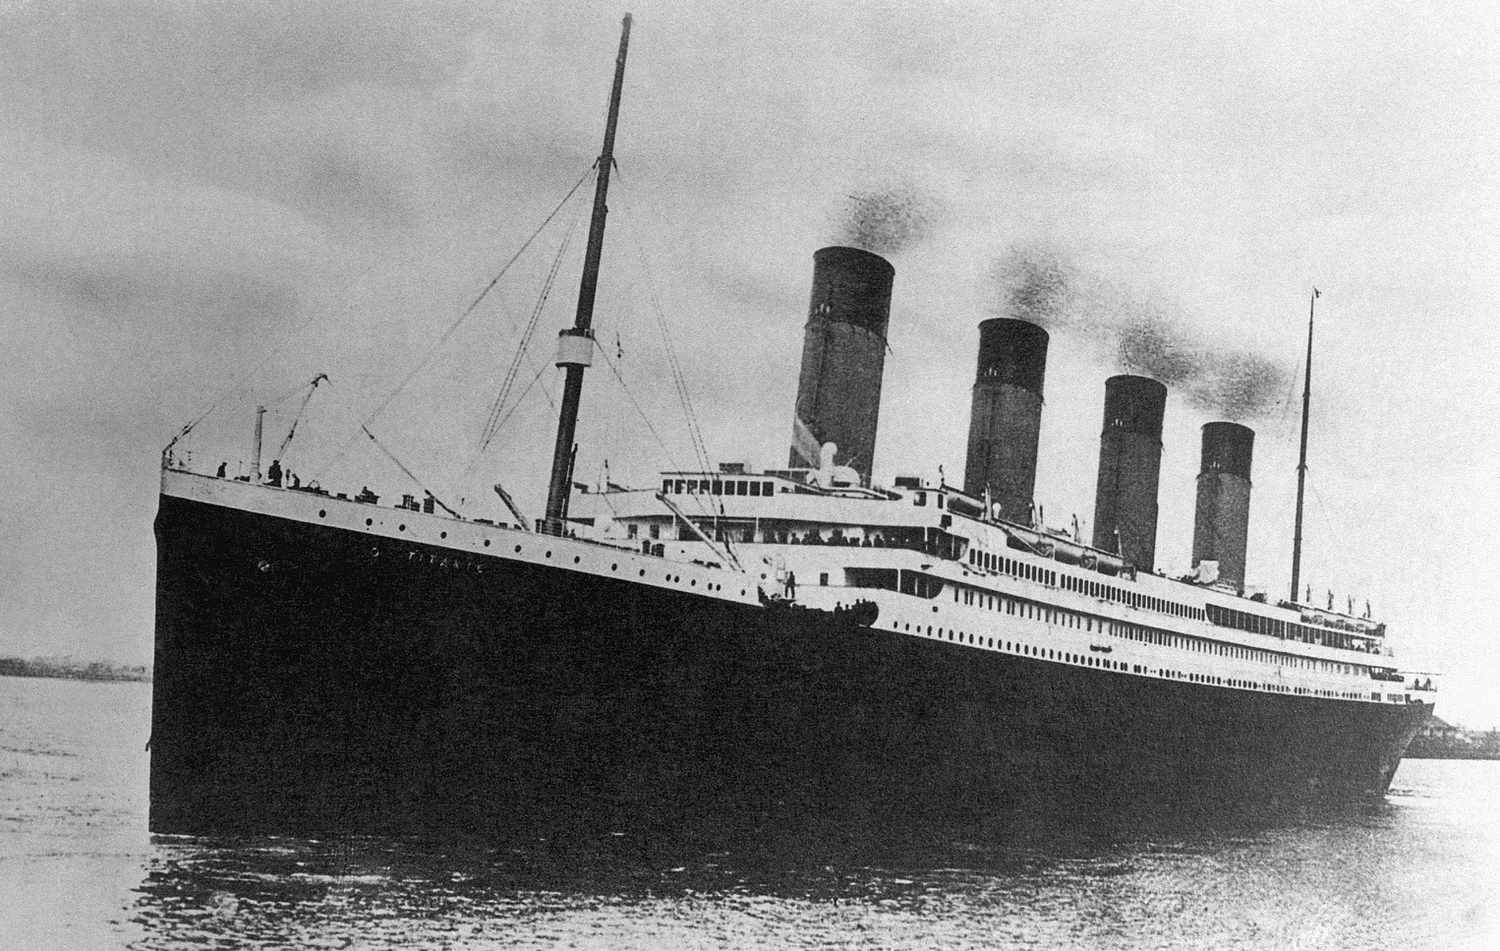

<center><img alt="" class="bg mk ml c" width="382" height="56" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:420/1*-_RmJIzCCL_GqhcR5bgowQ.png"></center>

O desenvolvimento de um modelo de aprendizado de máquina compreende várias etapas, incluindo a coleta de dados, o tratamento de valores nulos, a transformação de colunas categóricas e o balanceamento de dados em projetos de classificação. Além disso, os dados são divididos em conjuntos de treino e teste. 

Em seguida, ocorre a seleção e treinamento de modelos, a avaliação de desempenho, o ajuste de hiperparâmetros e a validação final. Para otimizar esse processo, surgiu o Automated Machine Learning (AutoML), que automatiza muitas dessas tarefas. Isso aumenta a produtividade dos cientistas de dados e permite que eles foquem na análise e na tomada de decisões. 

Há várias ferramentas de AutoML disponíveis, como AutoSK, TPOT, AutoKeras, Amazon SageMaker Autopilot, Google Cloud AutoML e PyCaret. O **`PyCaret`**, que é o foco deste projeto, que é uma ferramenta de código aberto e de baixo código, permitindo desenvolver soluções de machine learning para problemas de `classificação`, `regressão`, `clusterização`, `detecção de anomalias` e `análise de séries temporais` com poucas linhas de código.<br><hr>

## <strong> Importando os pacotes para classificação </strong>

[python]

No código a seguir, está sendo feito o **import** de diversas funções da **biblioteca** `pycaret.classification` e do **pandas** para realizar tarefas de classificação de dados. A **função** `setup` é usada para configurar o ambiente de trabalho com o conjunto de dados fornecido, permitindo a preparação automática dos dados para o modelo de machine learning. A **função** `compare_models` avalia e compara múltiplos modelos de classificação para identificar o melhor desempenho. Com a **função** `models`, é possível visualizar uma lista de todos os modelos disponíveis. A **função** `create_model` permite criar um modelo específico a partir dos disponíveis. A **função** `predict_model` faz previsões com base no modelo treinado. Para otimizar o desempenho, a **função** `tune_model` ajusta os hiperparâmetros do modelo. A visualização dos resultados pode ser feita com a **função** `plot_model`, enquanto a **função** `evaluate_model` fornece uma avaliação detalhada do modelo. Após essas etapas, a **função** `finalize_model` bloqueia o modelo final para uso em produção. Por fim, as **funções** `save_model` e `load_model` permitem salvar e carregar o modelo treinado, respectivamente. O **pandas** é usado para a manipulação e análise dos dados antes de serem inseridos no pipeline de classificação.

In [1]:
from pycaret.classification import (
    setup,
    compare_models,
    models,
    create_model,
    predict_model,
    tune_model,
    plot_model,
    evaluate_model,
    finalize_model,
    save_model,
    load_model
)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <strong> Coletando e carregando um conjunto de dados predefinido os dados </strong>

No código a seguir, está sendo **importada** a **função** `get_data` da **biblioteca** `pycaret.datasets`, que é usada para carregar um **conjunto de dados** predefinido. O **conjunto de dados** escolhido é o do Titanic, identificado pelo **parâmetro** `'titanic'`, que contém informações sobre os passageiros do navio, incluindo se eles **sobreviveram** ou não, com a variável alvo sendo `"Survived"`. Após o carregamento dos dados na **variável** `df`, a função `df.shape` é utilizada para obter o **tamanho** do DataFrame, ou seja, o número de linhas e colunas. Esse tamanho é então exibido com uma **mensagem formatada** usando o **método** `print`, que mostra a quantidade de entradas e atributos do conjunto de dados.

In [2]:
from pycaret.datasets import get_data

df = get_data('titanic')
print("Tamanho de df: {}\n".format(df.shape))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Tamanho de df: (891, 12)



In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.050,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.000,C93,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.775,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.500,B50,C


## <strong> Verificando informações do arquivo com o método `info` </strong>

No código a seguir, está sendo utilizada a **função** `info()` do **pandas.DataFrame** (identificado como `df`), que é parte da **biblioteca** `pandas`. Esta função exibe informações sobre o DataFrame, como o número de entradas, a quantidade de valores não nulos e o tipo de dados de cada coluna. É uma ferramenta útil para entender a estrutura e o conteúdo do DataFrame antes de realizar análises mais aprofundadas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <strong> Verificando se há valores nulos (dados missing) com o método `isnull` </strong>

No código a seguir, está sendo utilizada a **função** `isnull()` do **pandas**, uma **biblioteca** para manipulação de dados, aplicada ao **DataFrame** `df` para verificar a presença de valores nulos. Em seguida, a **função** `sum()` é chamada para somar o total de valores nulos em cada coluna do `df`, retornando uma série com o nome das colunas e a contagem de valores nulos correspondentes.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <strong> Verificando o total de valores únicos de cada variável com o método `nunique` </strong>

No código a seguir, está sendo utilizada a **método** `nunique()` da **biblioteca** `pandas` para contar o número de valores únicos em cada coluna de um **DataFrame**. A **método** `nunique()` retorna uma série contendo o número de valores distintos, excluindo os valores nulos, para cada coluna do **DataFrame** `df`. Isso é útil para entender a diversidade dos dados presentes em cada coluna.

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## <strong> Verificando algumas medidas estatisticas com o método `describe` </strong>

No código a seguir, está sendo utilizada a **método** `describe()` do **pandas DataFrame** `df` para visualizar algumas medidas estatísticas. Essa **função** gera um resumo estatístico que inclui contagem, média, desvio padrão, valores mínimos, valores máximos e os quartis (25%, 50% e 75%) das colunas numéricas do DataFrame. Este método é útil para obter rapidamente uma visão geral das características estatísticas dos dados, auxiliando na análise exploratória dos dados.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


No código a seguir, está sendo utilizada a **biblioteca** Pandas para gerar uma análise estatística descritiva de um **DataFrame**. A **função** `describe` é chamada com o **parâmetro** `include=[object]`, o que faz com que apenas as colunas do tipo **object** (tipicamente strings) sejam incluídas na análise. Esta análise fornece informações como a contagem, quantidade de valores únicos, valor mais frequente e frequência do valor mais frequente para cada coluna de texto no **DataFrame**.

In [10]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
df.describe(include=[object]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## <strong> Verificando quantidade de observações por Sexo usando o médodo `groupby` </strong>

No código a seguir, está sendo utilizada a **método** `groupby` da **biblioteca** `pandas` para agrupar os dados do **DataFrame** `df` pelo **parâmetro** `Sex`. Em seguida, a **função** `size` é chamada para contar o número de observações em cada grupo. Isso resulta na quantidade total de entradas para cada categoria de sexo presente no conjunto de dados.

In [12]:
df.groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

## <strong> Visualizando a distribuição dos passageros por sexo usando o método `value_counts` </strong>

No código a seguir, está sendo utilizada a **Biblioteca** *Matplotlib* para criar uma visualização em forma de gráfico de pizza da distribuição de pacientes por sexo em um *DataFrame* chamado **df**. Primeiramente, a **Função** *plt.figure* define o tamanho da figura. Em seguida, a **Função** *value_counts* da coluna '`Sex`' do **DataFrame** **df** conta as ocorrências de cada sexo, e a **Função** *plot.pie* cria o gráfico de pizza com os valores calculados, formatando as porcentagens com duas casas decimais através do **Parâmetro** *autopct*. O título do gráfico é definido pela **Função** *plt.title*. A **Função** *plt.tight_layout* ajusta automaticamente os parâmetros da figura para que a disposição seja mais organizada. Por fim, *plt.show* exibe o gráfico gerado.

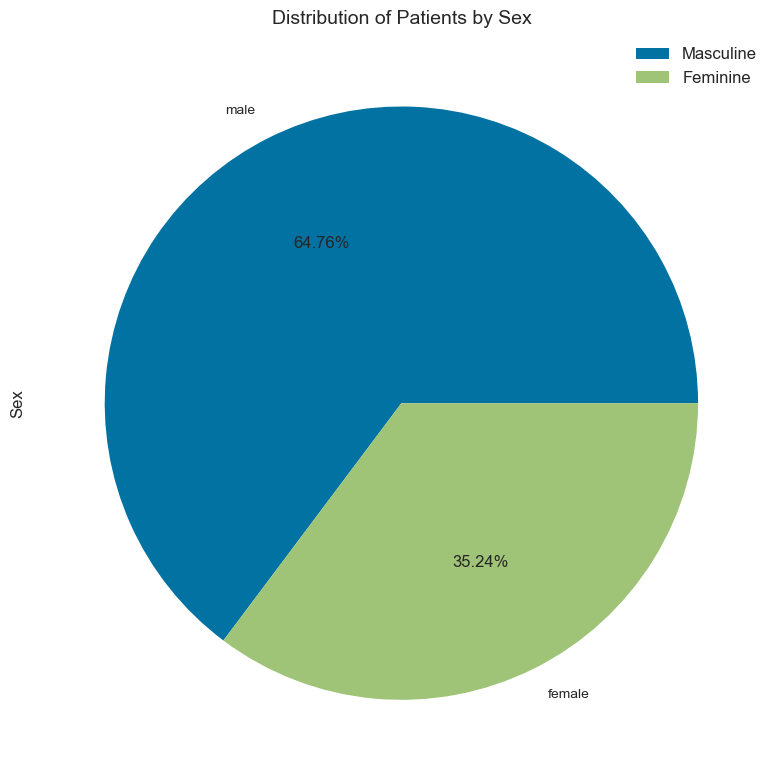

In [13]:
plt.figure(figsize=(8,8))
df['Sex'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(8,8))

plt.title("Distribution of Patients by Sex", fontsize=14)
plt.legend(["Masculine", "Feminine"], fontsize=12)
plt.ylabel("Sex", fontsize=12)
plt.tight_layout()

plt.show()

## <strong> Visualizando a distribuição dos pacientes usando a função `boxplot` </strong>

No código a seguir, está sendo utilizada a **biblioteca** `matplotlib.pyplot`, importada como `plt`, em conjunto com a **biblioteca** `seaborn`, importada como `sns`, para criar um gráfico de caixas que mostra a distribuição de idades por sexo. Primeiro, a **função** `plt.figure()` define o tamanho da figura para 10 por 6 polegadas através do **parâmetro** `figsize`. Em seguida, a **função** `sns.boxplot()` é utilizada para gerar o gráfico de caixas, onde o **parâmetro** `x` representa o eixo x (sexo) e `y` representa o eixo y (idade), utilizando os dados do **dataframe** `df` passado pelo **parâmetro** `data`. O título do gráfico é definido pela **função** `plt.title()`, com o texto "Age Distribution by Sex" e tamanho de fonte especificado pelo **parâmetro** `fontsize`. As etiquetas dos eixos x e y são definidas respectivamente pelas **funções** `plt.xlabel()` e `plt.ylabel()`, ambas também especificando o tamanho da fonte. Finalmente, o gráfico é exibido pela **função** `plt.show()`.

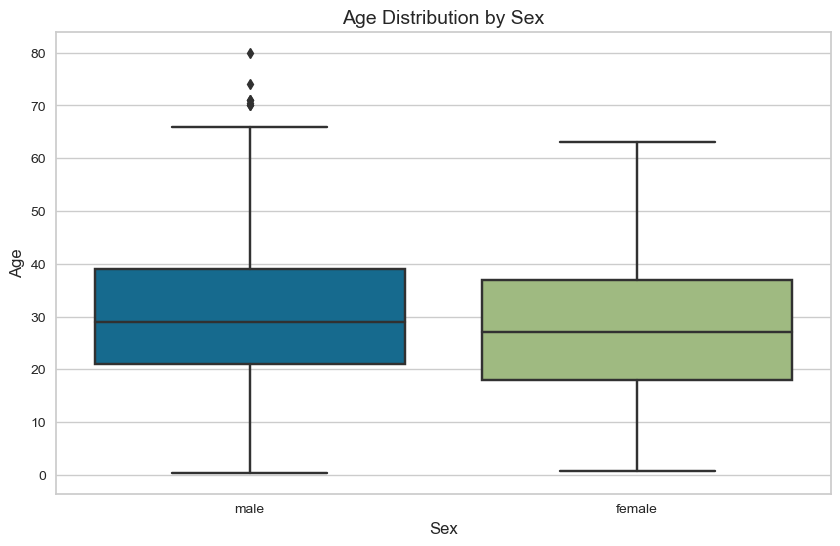

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sex", y="Age", data=df)

plt.title("Age Distribution by Sex", fontsize=14)
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.show()

## <strong> Visualizando a distribuição dos passagérios por sexo usando o método `value_counts` </strong>

No código a seguir, está sendo utilizado a **biblioteca** `matplotlib.pyplot` para criar um gráfico de barras que mostra a distribuição dos pacientes por sexo. Primeiramente, a **função** `plt.figure()` é usada para definir o tamanho e a resolução da figura. Em seguida, a **função** `value_counts()` é aplicada na coluna `'Sex'` do DataFrame `df` para contar a frequência de cada categoria de sexo. Esses valores são então plotados como um gráfico de barras utilizando a **função** `plot()`, com os parâmetros `kind='bar'` para especificar o tipo de gráfico, `title` para definir o título do gráfico e `color` para definir as cores das barras. As etiquetas dos eixos x e y são definidas pelas **funções** `plt.xlabel()` e `plt.ylabel()`, respectivamente, com um tamanho de fonte específico. Finalmente, o gráfico é exibido com a **função** `plt.show()`.

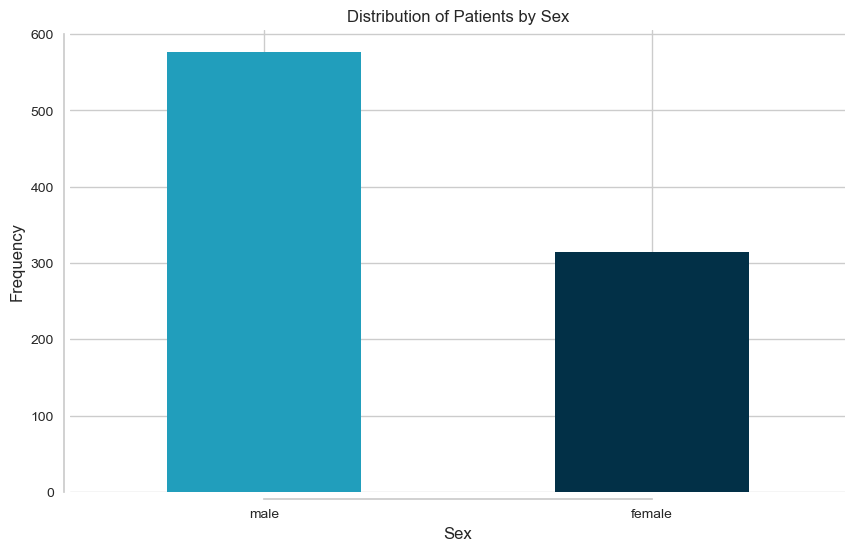

In [15]:
plt.figure(figsize=(10, 6), dpi=100)
df['Sex'].value_counts().plot(kind='bar', title='Distribution of Patients by Sex', color=['#219ebc', '#023047'])

plt.xlabel("Sex", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

## <strong> Separando os dados em teste e treino </strong>

No código a seguir, está sendo realizada a separação dos dados em conjuntos de **treinamento** e **teste**. Primeiramente, a função **`sample`** da **biblioteca** Pandas é utilizada para selecionar aleatoriamente 10% dos dados do **DataFrame** **`df`**, com a fração especificada pelo **parâmetro** **`frac=0.10`** e garantindo reprodutibilidade ao definir o **parâmetro** **`random_state=1`**. Os dados restantes são atribuídos ao conjunto de **treinamento** utilizando a função **`drop`**, que remove as linhas correspondentes ao conjunto de **teste**. Em seguida, a função **`reset_index`** é aplicada a ambos os conjuntos, com o **parâmetro** **`inplace=True`** para alterar os índices no próprio DataFrame e **`drop=True`** para evitar a criação de uma nova coluna com os índices antigos, garantindo que ambos os conjuntos tenham índices sequenciais e ininterruptos.

In [16]:
test = df.sample(frac=0.10, random_state=1)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

## <strong> Verificando o formato dos conjuntos </strong>

No código a seguir, está sendo verificado o formato dos conjuntos de dados chamados **`train`** e **`test`**. Aqui, a função **`print()`** é usada para exibir as dimensões desses conjuntos. O método **`shape`**, que é um atributo de objetos do tipo **`array`** do **`NumPy`** (uma *biblioteca* amplamente utilizada para cálculos numéricos), retorna uma tupla representando o número de linhas e colunas presentes em cada conjunto de dados. Isso é útil para garantir que os dados têm o formato esperado antes de prosseguir com análises ou modelagem.

In [17]:
print(train.shape)
print(test.shape)

(802, 12)
(89, 12)


## <strong> Criando um pipeline do PyCaret com as configurações definidas </strong>

No código a seguir, está sendo configurado um **dicionário** chamado `pipeline_config` que armazena as configurações para um pipeline de machine learning utilizando a **biblioteca** `PyCaret`. Este **dicionário** inclui os **parâmetros** `'data'`, que recebe o conjunto de dados de treinamento `train`, e `'target'`, que define a coluna `'Survived'` como a **variável alvo** para predição. Em seguida, a **função** `setup` da **biblioteca** `PyCaret` é chamada, utilizando o **dicionário** `pipeline_config` para inicializar o ambiente de treinamento.

In [18]:
pipeline_config = {
    'data': train,
    'target': 'Survived', 
}

clf = setup(**pipeline_config)

,Description,Value
0,Session id,8313
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(802, 12)"
4,Transformed data shape,"(802, 14)"
5,Transformed train set shape,"(561, 14)"
6,Transformed test set shape,"(241, 14)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.7%


No código a seguir, está sendo definido um **dicionário** chamado `data_config` que armazena as **configurações** para um pipeline de machine learning. Dentro deste dicionário, cada item configura um aspecto específico do processo: o parâmetro `'data'` indica o conjunto de dados de treinamento (`train`), enquanto `'target'` especifica a coluna de rótulos a ser prevista (`'Survived'`). As opções `'normalize'` e `'transformation'` são **booleanos** que ativam a normalização e transformação dos dados. O `'session_id'` é um **inteiro** que assegura a repetibilidade dos resultados, garantindo que execuções futuras do pipeline com os mesmos dados e configurações gerem os mesmos resultados. O `'remove_multicollinearity'` é uma opção para remover colinearidade entre as variáveis com um **limite** definido por `'multicollinearity_threshold'`. A lista `'ignore_features'` especifica quais colunas serão ignoradas no modelo, e `'experiment_name'` nomeia o experimento. Por fim, o pipeline é criado chamando a **função** `setup()` e passando todas essas configurações como **parâmetros** através do operador `**`, que expande o dicionário em argumentos nomeados para a função.

In [19]:
data_config = {
    'data': train,
    'target': 'Survived',
    'normalize': True,
    'transformation': True,
    'session_id': 3241, 
    'remove_multicollinearity': True,
    'multicollinearity_threshold': 0.95,
    'ignore_features': ["Name", "Ticket", "Cabin", "PassengerId"],
    'experiment_name': 'titanic_01'
}

clf = setup(**data_config)

,Description,Value
0,Session id,3241
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(802, 12)"
4,Transformed data shape,"(802, 10)"
5,Transformed train set shape,"(561, 10)"
6,Transformed test set shape,"(241, 10)"
7,Ignore features,4
8,Numeric features,5
9,Categorical features,2


## <strong> Comparando modelos e selecionando o melhor com as configurações definidas </strong>

No código a seguir, está sendo criada uma **dicionário** chamado **"model_comparison_config"** que armazena as configurações para a comparação de modelos de aprendizado de máquina. Nesse dicionário, existe um **parâmetro** chamado **'sort'**, que está configurado para ordenar os modelos de acordo com a **"Accuracy"** (precisão). Em seguida, o código utiliza a **função** **"compare_models"** e passa as configurações armazenadas no dicionário como argumentos para essa função usando o operador **"descompactação de dicionário"** (**"**\*\***"), que automaticamente converte as chaves e valores do dicionário em parâmetros nomeados para a função. A função **"compare_models"** então compara diferentes modelos de aprendizado de máquina com base na configuração fornecida e retorna o melhor modelo, que é armazenado na variável **"best"**.

In [22]:
model_comparison_config = {
    'sort': 'Accuracy',
}

best = compare_models(**model_comparison_config)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:03:25
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8359,0.8669,0.6955,0.8496,0.7575,0.6369,0.6493,2.3060
gbc,Gradient Boosting Classifier,0.8199,0.8578,0.6998,0.8038,0.7424,0.6061,0.6138,0.3600
knn,K Neighbors Classifier,0.8164,0.8271,0.6959,0.8000,0.7393,0.5995,0.6070,0.3320
rf,Random Forest Classifier,0.8147,0.8423,0.7045,0.7944,0.7392,0.5972,0.6057,0.4830
lightgbm,Light Gradient Boosting Machine,0.8145,0.8505,0.7141,0.7804,0.7419,0.5982,0.6030,0.3700
lr,Logistic Regression,0.8075,0.8589,0.7095,0.7705,0.7337,0.5841,0.5893,0.0810
ada,Ada Boost Classifier,0.8075,0.8449,0.7420,0.7559,0.7438,0.5902,0.5949,0.1520
ridge,Ridge Classifier,0.8004,0.8614,0.7002,0.7648,0.7255,0.5697,0.5757,0.0740
lda,Linear Discriminant Analysis,0.7986,0.8612,0.7002,0.7615,0.7237,0.5663,0.5724,0.0980
xgboost,Extreme Gradient Boosting,0.7967,0.8319,0.7043,0.7466,0.7207,0.5616,0.5658,0.1580


## <strong> Instanciando o melhor modelo </strong>

No código a seguir, está sendo utilizada a **Função** `create_model` para criar dois modelos de machine learning diferentes do framework **PyCaret**. O primeiro modelo, `catboost`, é baseado na **Biblioteca** CatBoost, que é um algoritmo eficiente para tarefas de classificação e regressão. O segundo modelo, `gbc`, utiliza o **Parâmetro** `'gbc'` para criar um modelo baseado em Gradient Boosting Classifier. Ambos os modelos são instanciados e armazenados em variáveis, prontos para serem treinados e avaliados em dados subsequentes.

In [23]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.8701,0.7727,0.9444,0.8500,0.7702,0.7794
1,0.8571,0.8763,0.7273,0.8889,0.8000,0.6906,0.6990
2,0.8929,0.9104,0.7727,0.9444,0.8500,0.7680,0.7773
3,0.7857,0.8529,0.6818,0.7500,0.7143,0.5435,0.5451
4,0.8214,0.9170,0.6190,0.8667,0.7222,0.5960,0.6143
5,0.8036,0.8816,0.7143,0.7500,0.7317,0.5769,0.5774
6,0.7500,0.8000,0.4762,0.7692,0.5882,0.4227,0.4477
7,0.7857,0.7619,0.4762,0.9091,0.6250,0.4947,0.5454
8,0.9107,0.9279,0.9048,0.8636,0.8837,0.8113,0.8119


In [24]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.8818,0.8182,0.8571,0.8372,0.7387,0.7392
1,0.8571,0.8977,0.7727,0.8500,0.8095,0.6957,0.6977
2,0.8750,0.9044,0.7727,0.8947,0.8293,0.7315,0.7364
3,0.7857,0.8616,0.6818,0.7500,0.7143,0.5435,0.5451
4,0.8214,0.9027,0.6190,0.8667,0.7222,0.5960,0.6143
5,0.7857,0.8537,0.7143,0.7143,0.7143,0.5429,0.5429
6,0.7500,0.7837,0.4762,0.7692,0.5882,0.4227,0.4477
7,0.7679,0.7633,0.5238,0.7857,0.6286,0.4694,0.4898
8,0.8393,0.8925,0.8571,0.7500,0.8000,0.6667,0.6708


## <strong> Verificando os parâmetros </strong>

No código a seguir, está sendo verificado o conteúdo dos parâmetros **`catboost`** e **`gbc`** usando a **função** `print()`. Essa função é utilizada para exibir o valor dos parâmetros no console, permitindo que o programador visualize seus conteúdos durante a execução do programa. **`catboost`** e **`gbc`** podem ser variáveis, objetos de **classes**, ou resultados de funções que foram definidos anteriormente no código, possivelmente ligados a bibliotecas ou modelos de machine learning. O objetivo é conferir os valores ou estruturas desses parâmetros para garantir que estejam corretos.

In [25]:
print(catboost)

In [26]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3241, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## <strong> Ajustando os hiperparâmetros </strong>

No código a seguir, está sendo realizado um **"tuning de parâmetros"** usando a **função** `tune_model`, que faz parte da biblioteca **PyCaret**, para ajustar os modelos de machine learning chamados **CatBoost** e **gbc**. O objetivo desse ajuste é encontrar a melhor combinação de parâmetros que maximize a **métrica** de **"Accuracy"** (acurácia). O **parâmetro** `optimize='Accuracy'` informa à **função** que a métrica a ser otimizada é a acurácia, ou seja, a proporção de previsões corretas que o modelo faz. O resultado é armazenado nas variáveis `tuned_catboost` e `tuned_gbc`, que conterá os modelos **CatBoost** e **gbc** otimizados. Este processo é crucial para melhorar o desempenho preditivo do modelo ao encontrar os melhores parâmetros para o conjunto de dados em questão.

In [27]:
tuned_catboost = tune_model(catboost, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.8656,0.8182,0.9000,0.8571,0.7741,0.7763
1,0.8750,0.8884,0.8182,0.8571,0.8372,0.7358,0.7364
2,0.8929,0.9104,0.7727,0.9444,0.8500,0.7680,0.7773
3,0.8036,0.8556,0.7273,0.7619,0.7442,0.5849,0.5853
4,0.8571,0.9354,0.7143,0.8824,0.7895,0.6832,0.6919
5,0.8214,0.8830,0.7619,0.7619,0.7619,0.6190,0.6190
6,0.8036,0.8218,0.5714,0.8571,0.6857,0.5510,0.5750
7,0.7321,0.7401,0.4762,0.7143,0.5714,0.3878,0.4046
8,0.8929,0.9333,0.9524,0.8000,0.8696,0.7798,0.7884


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
tuned_gbc = tune_model(gbc, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8688,0.7727,0.8095,0.7907,0.6640,0.6645
1,0.8393,0.9178,0.7273,0.8421,0.7805,0.6548,0.6592
2,0.8929,0.9037,0.7727,0.9444,0.8500,0.7680,0.7773
3,0.7857,0.8650,0.6818,0.7500,0.7143,0.5435,0.5451
4,0.8036,0.8932,0.5714,0.8571,0.6857,0.5510,0.5750
5,0.7679,0.8340,0.6190,0.7222,0.6667,0.4902,0.4936
6,0.8036,0.8395,0.5714,0.8571,0.6857,0.5510,0.5750
7,0.7679,0.7361,0.4762,0.8333,0.6061,0.4583,0.4944
8,0.8571,0.9156,0.8095,0.8095,0.8095,0.6952,0.6952


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## <strong> Verificando os parâmetros ajustados </strong>

No código a seguir, está sendo utilizado o comando **print** (*Função*) para exibir os valores das variáveis **tuned_catboost** e **tuned_gbc** (*Parâmetros*). Estas variáveis provavelmente contêm modelos de machine learning ajustados, possivelmente instâncias de classes relacionadas à **Biblioteca** CatBoost e Gradient Boosting Classifier (GBC). O código serve para verificar e visualizar os parâmetros ou configurações atuais dos modelos treinados, permitindo ao usuário entender melhor como os modelos foram configurados após o ajuste.

In [29]:
print(tuned_catboost)

In [30]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3241, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## <strong> Plotando o modelo em uma Matriz de Cnfusão </strong>

No código a seguir, está sendo utilizada a **Função** `plot_model` para gerar uma **Matriz de Confusão**, que é um tipo de gráfico usado para avaliar a performance de um modelo de classificação. A **Função** `plot_model` recebe dois **Parâmetros**: o primeiro é o modelo a ser avaliado (`catboost` ou `gbc`), e o segundo define o tipo de gráfico a ser gerado (`plot='confusion_matrix'`). Este código, portanto, visualiza e compara como os modelos `catboost` e `gbc` (ambos **Classes** de modelos de machine learning) estão classificando corretamente ou incorretamente os dados.

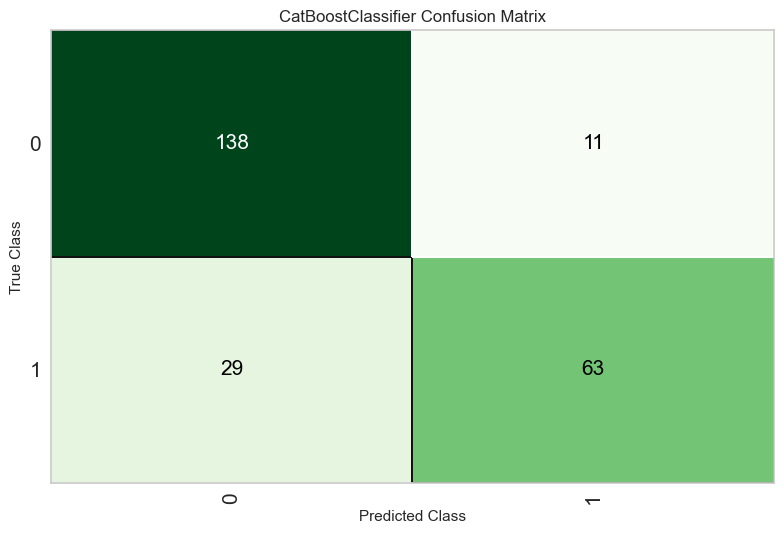

In [31]:
plot_model(catboost, plot='confusion_matrix')

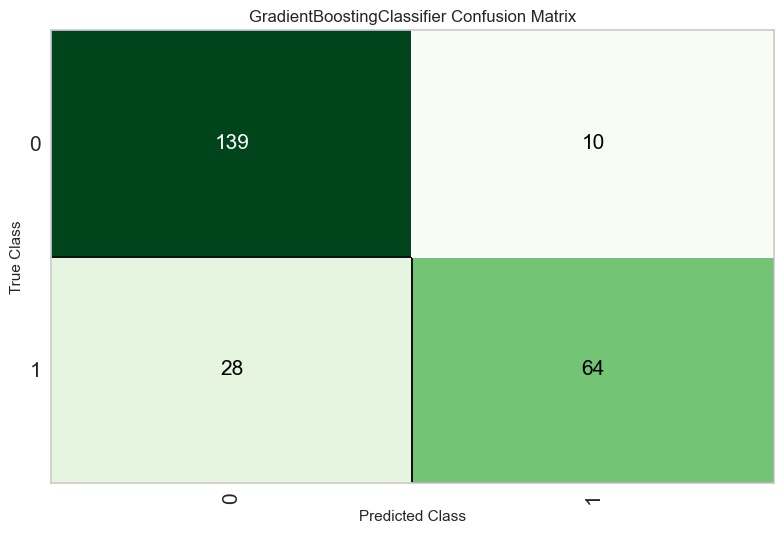

In [32]:
plot_model(gbc, plot='confusion_matrix')

No código a seguir, está sendo usada a **função** `plot_model` para gerar gráficos de importância das variáveis de dois modelos de machine learning: o **modelo** `catboost` e o **modelo** `gbc`. O **parâmetro** `plot='feature'` indica que o tipo de gráfico a ser gerado é o de importância das features (variáveis). Esse gráfico ajuda a visualizar quais variáveis têm maior impacto nas previsões feitas pelos modelos, auxiliando na interpretação dos resultados.

## <strong> Visualizar a melhor `Feature` utilizada no modelo usando a função `plot_model` </strong>

No código a seguir, está sendo utilizada a **função** `plot_model` da **biblioteca** `pycaret`, que é uma ferramenta de machine learning automatizada. Os **parâmetros** `catboost` e `gbc` representam os modelos previamente ajustado e treinado. O **parâmetro** `plot` é configurado com o valor `'feature'`, indicando que o tipo de gráfico a ser gerado é um gráfico de importância de características. Este gráfico visualiza a importância de cada variável de entrada no modelo de regressão Ridge ajustado, ajudando a entender quais características têm mais impacto na predição.

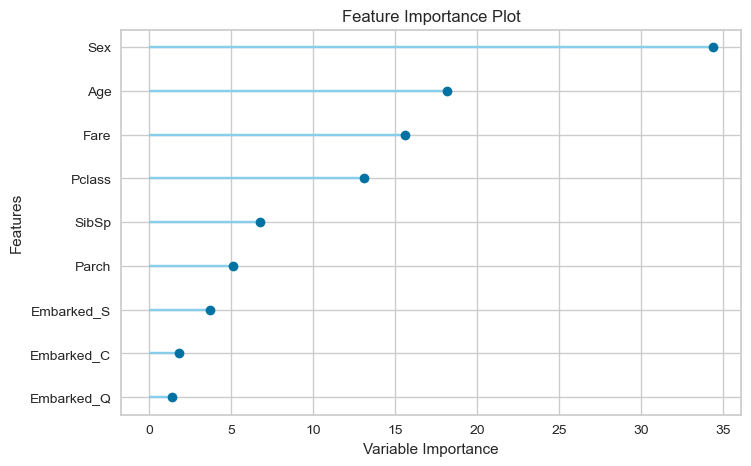

In [34]:
plot_model(catboost, plot='feature')

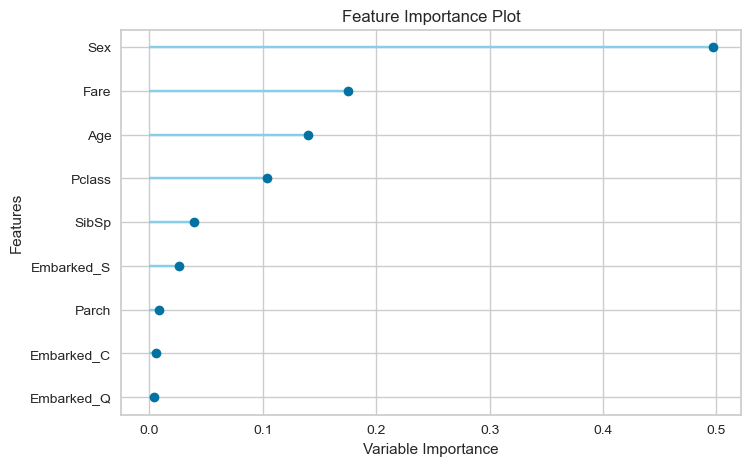

In [36]:
plot_model(gbc, plot='feature')

## <strong> Avaliando os modelos usando a função `evaluate_model` </strong>

No código a seguir, está sendo utilizada a **função** `evaluate_model` para avaliar dois modelos de aprendizado de máquina. O primeiro modelo é chamado `catboost`, enquanto o segundo é `gbc`. Ambos são passados como **parâmetros** para a **função** `evaluate_model`, que provavelmente é responsável por realizar alguma análise ou teste de desempenho nesses modelos. A diferença entre os dois modelos pode estar na forma como foram treinados ou ajustados; `model_ridge` pode representar um modelo de regressão ridge padrão, enquanto `model_tune_ridge` sugere que o modelo passou por algum processo de ajuste fino ou otimização de hiperparâmetros. Esta avaliação é essencial para comparar o desempenho dos modelos e escolher o mais eficaz para o problema em questão.

In [37]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## <strong> Fazendo previsões usando a função `predict_model` </strong>

No código a seguir, está sendo utilizado a **função** `predict_model` para fazer previsões usando dois modelos de machine learning previamente treinados. O **parâmetro** passado para essa função é o modelo de machine learning específico, como `catboost` e `gbc`. `catboost` é um modelo que faz parte da **biblioteca** CatBoost, conhecida por lidar bem com dados categóricos, enquanto `gbc` refere-se a um modelo de **classe** Gradient Boosting Classifier, usado para criar predições baseadas em uma combinação de múltiplas árvores de decisão. A função retorna as previsões feitas por cada um desses modelos.

In [39]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8340,0.8617,0.6848,0.8514,0.7590,0.6347,0.6435


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
467,3,male,NaN,0,0,24.150000,Q,0,0,0.7898
170,2,male,19.0,0,0,13.000000,S,0,0,0.8634
747,1,female,62.0,0,0,80.000000,NaN,1,1,0.9634
179,3,male,28.0,0,0,9.500000,S,0,0,0.9306
294,3,female,31.0,1,1,20.525000,S,1,0,0.5202
...,...,...,...,...,...,...,...,...,...,...
637,1,female,18.0,1,0,227.524994,C,1,1,0.9708
372,3,male,44.0,0,0,7.925000,S,1,0,0.9353
35,3,male,NaN,0,0,7.895800,C,0,0,0.8439
691,1,female,36.0,1,2,120.000000,S,1,1,0.9428


In [40]:
predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8423,0.8367,0.6957,0.8649,0.7711,0.6530,0.6620


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
467,3,male,NaN,0,0,24.150000,Q,0,0,0.8253
170,2,male,19.0,0,0,13.000000,S,0,0,0.8855
747,1,female,62.0,0,0,80.000000,NaN,1,1,0.9701
179,3,male,28.0,0,0,9.500000,S,0,0,0.9107
294,3,female,31.0,1,1,20.525000,S,1,1,0.5202
...,...,...,...,...,...,...,...,...,...,...
637,1,female,18.0,1,0,227.524994,C,1,1,0.9499
372,3,male,44.0,0,0,7.925000,S,1,0,0.9525
35,3,male,NaN,0,0,7.895800,C,0,0,0.8492
691,1,female,36.0,1,2,120.000000,S,1,1,0.9835


A acurácia no conjunto de teste ficou em **0.8423** comparado a **0.8199** na média da validação cruzada.

## <strong> Finalizando os modelos de machine learning com a função `finalize_model` </strong>

No código a seguir, está sendo utilizada a **função** `finalize_model` para finalizar o treinamento de dois modelos de machine learning: o primeiro é o **modelo** `catboost` e o segundo é o **modelo** `gbc`. A **função** `finalize_model` ajusta e otimiza os modelos usando todo o conjunto de dados disponível, preparando-os para uso em produção. O **modelo** `catboost` refere-se a uma instância da **classe** `CatBoostClassifier`, enquanto o **modelo** `gbc` é uma instância da **classe** `GradientBoostingClassifier`, ambas comumente usadas para tarefas de classificação.

In [41]:
final_catboost = finalize_model(catboost)

In [42]:
final_gbc = finalize_model(gbc)

## <strong> verificando os parâmetros após os ajustados </strong>

No código a seguir, está sendo usado o **parâmetro** `final_catboost` e o **parâmetro** `final_gbc`, ambos impressos na tela utilizando a **função** `print()`. O objetivo é verificar os valores atribuídos a esses parâmetros, após terem sido configurados ou ajustados em algum ponto anterior do código. Essa prática é comum para inspecionar se as variáveis contêm os valores esperados ou para depuração, garantindo que os parâmetros estejam corretos antes de prosseguir com outras operações.

In [43]:
print(final_catboost)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=['Sex...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=PowerTransformer(copy=True,
    

In [44]:
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=['Sex...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, 

## <strong> Analisando a mudança nos resultados preditivos com `predict_model` </strong>

No código a seguir, está sendo utilizada a **função** `predict_model` para analisar os resultados preditivos de dois modelos treinados. O primeiro modelo, `final_catboost`, e o segundo modelo, `final_gbc`, são passados como **parâmetros** para a função junto com o conjunto de dados `df`, fornecido através do **parâmetro** `data`. Os resultados dessas previsões são armazenados nas variáveis `pred_holdout_catboost` e `pred_holdout_gbc`, respectivamente, permitindo comparar a performance de ambos os modelos em relação aos dados de validação.

In [45]:
pred_holdout_catboost = predict_model(final_catboost, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8878,0.9467,0.7719,0.9231,0.8408,0.7552,0.7624


In [46]:
pred_holdout_gbc = predict_model(final_gbc, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8833,0.9445,0.7749,0.9075,0.8360,0.7462,0.7519


## <strong> Fazendo previsões em dados novos com a função `predict_model` </strong>

No código a seguir, está sendo utilizado a **Função** `predict_model` para fazer previsões em dois modelos diferentes: `final_catboost` e `final_gbc`. O primeiro faz previsões usando o **Modelo** `final_catboost`, enquanto o segundo utiliza o **Modelo** `final_gbc`. O conjunto de dados de teste é passado como **Parâmetro** `data=test` para ambos os modelos, permitindo que sejam geradas previsões para os dados não vistos. Essas previsões são armazenadas nas variáveis `test_preds_catboost` e `test_preds_gbc`, respectivamente.

In [47]:
test_preds_catboost = predict_model(final_catboost, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7640,0.8449,0.5556,0.8000,0.6557,0.4850,0.5037


In [48]:
test_preds_gbc = predict_model(final_gbc, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7528,0.8530,0.5556,0.7692,0.6452,0.4630,0.4774


## <strong> Realizando previsões em dados não vistos </strong>

No código a seguir, está sendo realizada a visualização das primeiras 10 previsões feitas por dois modelos de aprendizado de máquina em um conjunto de dados não vistos. A **função** `head(10)` é usada para exibir as primeiras 10 linhas das previsões. O código contém as variáveis `test_preds_catboost` e `test_preds_gbc`, que armazenam as previsões feitas, respectivamente, pelo **modelo** **CatBoost** e pelo **modelo** **Gradient Boosting Classifier (GBC)**, ambos utilizados para tarefas de classificação ou regressão.

In [49]:
test_preds_catboost.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.929199,D17,S,1,1,0.9452
1,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.895800,NaN,S,0,0,0.9091
2,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500000,NaN,S,1,1,0.8955
3,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.137500,NaN,Q,0,1,0.7609
4,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250000,NaN,S,1,1,0.9628
5,624,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.854200,NaN,S,0,0,0.8974
6,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.000000,F2,S,0,0,0.8404
7,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,1,1,0.9832
8,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.170799,NaN,C,0,1,0.5257
9,242,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.500000,NaN,Q,1,1,0.7664


In [50]:
test_preds_gbc.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.929199,D17,S,1,1,0.9514
1,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.895800,NaN,S,0,0,0.9119
2,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500000,NaN,S,1,1,0.9516
3,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.137500,NaN,Q,0,1,0.6748
4,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250000,NaN,S,1,1,0.8744
5,624,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.854200,NaN,S,0,0,0.9157
6,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.000000,F2,S,0,0,0.8793
7,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,1,1,0.9729
8,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.170799,NaN,C,0,1,0.5354
9,242,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.500000,NaN,Q,1,1,0.7459


## <strong> Salvando os modelos de machine learning para uso posterior </strong>

No código a seguir, está sendo utilizado a **função** `save_model` para salvar dois modelos de machine learning para uso posterior. O primeiro modelo, `final_catboost`, é salvo com o nome de arquivo "Model_CATBOOST_20231017". O segundo, `final_gbc`, é salvo com o nome "Model_GBC_20231017". A **função** `save_model` é responsável por armazenar os modelos em arquivos, permitindo que sejam reutilizados sem necessidade de re-treinamento.

In [51]:
save_model(final_catboost, "Model_CATBOOST_20231017")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['Sex...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=PowerTransformer(

In [53]:
save_model(final_gbc, "Model_GBC_20231017")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['Sex...
                                             criterion='friedman_mse', init=None,
                                             lear

## <strong> Carregando os modelos pré-treinados com a função `load_model` </strong>

No código a seguir, está sendo feita a carga de dois modelos pré-treinados utilizando a **função** `load_model`. O primeiro modelo, chamado 'Model_CATBOOST_20231017', é carregado e armazenado na variável `saved_final_catboost`. O segundo, denominado 'Model_GBC_20231017', é carregado e armazenado na variável `saved_final_gbc`. A **função** `load_model` é usada para restaurar o estado dos modelos a partir de arquivos salvos, permitindo que sejam utilizados novamente para fazer previsões sem a necessidade de re-treinamento.

In [54]:
saved_final_catboost = load_model('Model_CATBOOST_20231017')

Transformation Pipeline and Model Successfully Loaded


In [55]:
saved_final_gbc = load_model('Model_GBC_20231017')

Transformation Pipeline and Model Successfully Loaded


## <strong> Fazendo previsões com o modelo salvo com a função `predict_model` </strong>

No código a seguir, está sendo realizada a previsão de dados usando dois modelos salvos. Primeiro, com a **Função** `predict_model`, o modelo salvo `saved_final_catboost` faz previsões sobre o conjunto de dados `test`, e o resultado é armazenado na variável `new_prediction_catboost`, que é exibido com o **Método** `head()`. Em seguida, a mesma **Função** `predict_model` é utilizada para o modelo salvo `saved_final_gbc`, e suas previsões são armazenadas em `new_prediction_gbc`, também exibidas com `head()`. A **Biblioteca** usada para a previsão e o gerenciamento dos modelos não está explicitamente mostrada, mas pode ser inferida pelo uso da **Função** `predict_model`.

In [56]:
new_prediction_catboost = predict_model(saved_final_catboost, data=test)
new_prediction_catboost.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7640,0.8449,0.5556,0.8000,0.6557,0.4850,0.5037


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.929199,D17,S,1,1,0.9452
1,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.895800,NaN,S,0,0,0.9091
2,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500000,NaN,S,1,1,0.8955
3,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.137500,NaN,Q,0,1,0.7609
4,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250000,NaN,S,1,1,0.9628


In [57]:
new_prediction_gbc = predict_model(saved_final_gbc, data=test)
new_prediction_gbc.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7528,0.8530,0.5556,0.7692,0.6452,0.4630,0.4774


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.929199,D17,S,1,1,0.9514
1,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.895800,NaN,S,0,0,0.9119
2,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500000,NaN,S,1,1,0.9516
3,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.137500,NaN,Q,0,1,0.6748
4,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250000,NaN,S,1,1,0.8744
